In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [41]:
medications_df = pd.read_csv("Resources/medications.csv")
medications_df

,HCPCS_Code,Drug_Description,Brand_Name,Generic_Name,2017_Total_Spending,2017_Total_Dosage_Units,2017_Total_Claims,2017_Total_Beneficiaries,2017_Average_Spending_Per_Dosage_Unit,2017_Average_Spending_Per_Claim,2017_Average_Spending_Per_Beneficiary,2017_Outlier_Flag,2018_Total_Spending,2018_Total_Dosage_Units,2018_Total_Claims,2018_Total_Beneficiaries,2018_Average_Spending_Per_Dosage_Unit,2018_Average_Spending_Per_Claim,2018_Average_Spending_Per_Beneficiary,2018_Outlier_Flag,2019_Total_Spending,2019_Total_Dosage_Units,2019_Total_Claims,2019_Total_Beneficiaries,2019_Average_Spending_Per_Dosage_Unit,2019_Average_Spending_Per_Claim,2019_Average_Spending_Per_Beneficiary,2019_Outlier_Flag,2020_Total_Spending,2020_Total_Dosage_Units,2020_Total_Claims,2020_Total_Beneficiaries,2020_Average_Spending_Per_Dosage_Unit,2020_Average_Spending_Per_Claim,2020_Average_Spending_Per_Beneficiary,2020_Outlier_Flag,2021_Total_Spending,2021_Total_Dosage_Units,2021_Total_Claims,2021_Total_Beneficiaries,2021_Average_Spending_Per_Dosage_Unit,2021_Average_Spending_Per_Claim,2021_Average_Spending_Per_Beneficiary,2021_Average_Sales_Price,2021_Outlier_Flag,2016_Total_Spending,2016_Total_Dosage_Units,2016_Total_Claims,2016_Total_Beneficiaries,2016_Average_Spending_Per_Dosage_Unit,2016_Average_Spending_Per_Claim,2016_Average_Spending_Per_Beneficiary,2016_Outlier_Flag,2022_Total_Spending,2022_Total_Dosage_Units,2022_Total_Claims,2022_Total_Beneficiaries,2022_Average_Spending_Per_Dosage_Unit,2022_Average_Spending_Per_Claim,2022_Average_Spending_Per_Beneficiary,2022_Average_Sales_Price,2022_Outlier_Flag
0,J9271,Inj pembrolizumab,Keytruda,Pembrolizumab,1033716692,22526012,109885,21816,45,9407,47383,0,1813727266,41818943,201492,35491,43,9001,51103,0,2673427540,60934811,293728,49743,43,9101,53744,0,3500947569,77271996,355684,58699,45,9842,59642,0,3966530837,85837941,373954,62830,46,10607,63131,51,0,326441184,7319892,36743,7332,44,8884,44522,0,4935971049,94600572,407389,67022,52,12116,73647,53,0
1,J0178,Aflibercept injection,Eylea,Aflibercept,2465832791,2566135,1162647,229369,960,2120,10750,0,2573938386,2730001,1228011,240910,942,2096,10684,0,2911408262,3123465,1391256,268296,932,2092,10851,0,3013081886,3269214,1435329,284454,921,2099,10592,0,3415890772,3758278,1635603,309699,908,2088,11029,918,0,2207882152,2292464,1047032,210340,963,2108,10496,0,3541909703,3933700,1698624,338615,900,2085,10459,911,0
2,J0897,Denosumab injection,Prolia*,Denosumab*,1238722483,74787573,952934,470360,16,1299,2633,0,1416968972,84040684,1078076,533286,16,1314,2657,0,1605208840,91759929,1192252,589684,17,1346,2722,0,1626844122,88865339,1161150,588171,18,1401,2765,0,1780811014,92793534,1241745,629724,19,1434,2827,20,0,1085135202,69684394,868024,418691,15,1250,2591,0,2003916528,93824328,1280103,657400,21,1565,3048,21,0
3,J9299,"Injection, nivolumab",Opdivo,Nivolumab,1470525369,57093050,221210,29076,25,6647,50575,0,1715907187,69929329,239434,32846,24,7166,52240,0,1782346827,71949143,212722,29910,24,8378,59590,0,1586591103,62072115,175292,25352,25,9051,62582,0,1573611852,60628423,173365,25426,25,9076,61889,28,0,1219517891,48517116,190578,27665,25,6399,44081,0,1849938540,64287344,181918,26957,28,10169,68625,29,0
4,J2778,Ranibizumab injection,Lucentis,Ranibizumab,1037747583,2787520,524318,105197,372,1979,9864,0,1215701656,3300831,618921,123389,368,1964,9852,0,1266791097,3602290,673557,130748,351,1880,9688,0,1113026179,3336914,611396,120647,333,1820,9225,0,1044929993,3331899,604786,114432,313,1727,9131,315,0,1044105658,2760439,525114,106389,378,1988,9814,0,795501258,2844896,513440,102227,279,1549,7781,280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,J1630,Haloperidol injection,Haldol*,Haloperidol Lactate*,1057,594,458,245,1,2,4,0,624,486,380,198,1,1,3,0,811,363,313,190,2,2,4,1,497,267,209

In [31]:
column = '_Total_Spending'
spending_columns = list(medications_df.loc[:,medications_df.columns.str.endswith(column)].columns.sort_values().values)
named_columns = ['HCPCS_Code', 'Brand_Name'] + spending_columns

total_spending_medications_df = medications_df[named_columns]
total_spending_medications_df


,HCPCS_Code,Brand_Name,2016_Total_Spending,2017_Total_Spending,2018_Total_Spending,2019_Total_Spending,2020_Total_Spending,2021_Total_Spending,2022_Total_Spending
0,J9271,Keytruda,326441184,1033716692,1813727266,2673427540,3500947569,3966530837,4935971049
1,J0178,Eylea,2207882152,2465832791,2573938386,2911408262,3013081886,3415890772,3541909703
2,J0897,Prolia*,1085135202,1238722483,1416968972,1605208840,1626844122,1780811014,2003916528
3,J9299,Opdivo,1219517891,1470525369,1715907187,1782346827,1586591103,1573611852,1849938540
4,J2778,Lucentis,1044105658,1037747583,1215701656,1266791097,1113026179,1044929993,795501258
...,...,...,...,...,...,...,...,...,...
414,J1630,Haldol*,2231,1057,624,811,497,535,547
415,J3105,Terbutaline Sulfate,1035,1298,718,1032,469,511,529
416,J1160,Digoxin*,79166,571,529,376,308,251,415
417,J2501,Paricalcitol*,1549,1325,729,267,201,234,10


In [38]:
total_spending_medications_df['Avg_per_brand'] = total_spending_medications_df.iloc[:,2:].mean(axis=1)
total_spending_medications_df = total_spending_medications_df.sort_values(by='Avg_per_brand', ascending=False)
total_spending_medications_df

/var/folders/0g/m_btl88n5hs7w95j59p7v2180000gn/T/ipykernel_45110/265397191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_spending_medications_df['Avg_per_brand'] = total_spending_medications_df.iloc[:,2:].mean(axis=1)


,HCPCS_Code,Brand_Name,2016_Total_Spending,2017_Total_Spending,2018_Total_Spending,2019_Total_Spending,2020_Total_Spending,2021_Total_Spending,2022_Total_Spending,Avg_per_brand
1,J0178,Eylea,2207882152,2465832791,2573938386,2911408262,3013081886,3415890772,3541909703,2.875706e+09
0,J9271,Keytruda,326441184,1033716692,1813727266,2673427540,3500947569,3966530837,4935971049,2.607252e+09
3,J9299,Opdivo,1219517891,1470525369,1715907187,1782346827,1586591103,1573611852,1849938540,1.599777e+09
2,J0897,Prolia*,1085135202,1238722483,1416968972,1605208840,1626844122,1780811014,2003916528,1.536801e+09
4,J2778,Lucentis,1044105658,1037747583,1215701656,1266791097,1113026179,1044929993,795501258,1.073972e+09
...,...,...,...,...,...,...,...,...,...,...
408,Q4111,Gammagraft,1434,1203,625,1019,667,1915,2453,1.330857e+03
412,J2675,Progesterone*,704,875,860,1692,1155,1074,868,1.032571e+03
414,J1630,Haldol*,2231,1057,624,811,497,535,547,9.002857e+02
415,J3105,Terbutaline Sulfate,1035,1298,718,1032,469,511,529,7.988571e+02


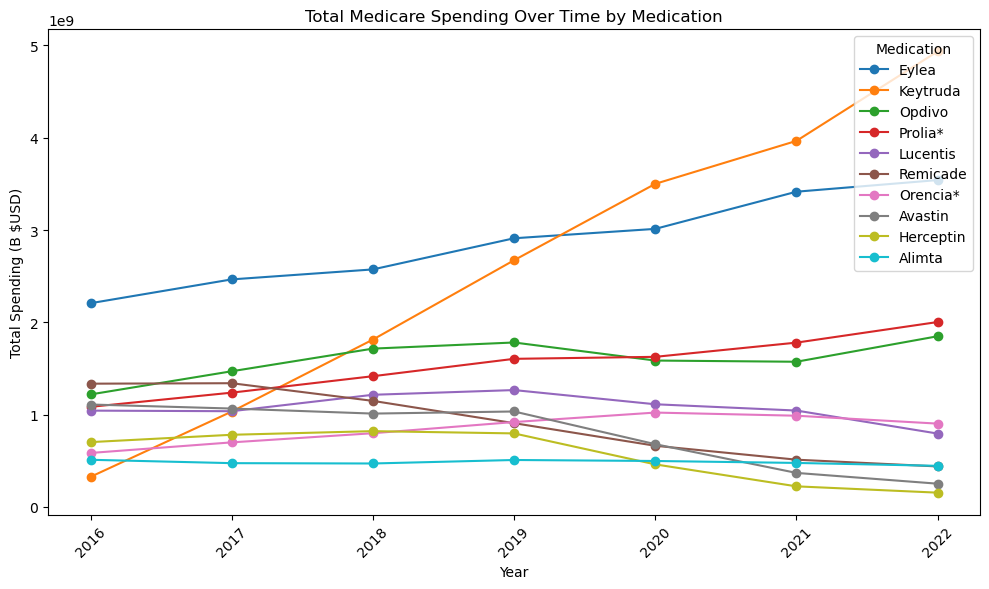

['2016_Total_Spending', '2017_Total_Spending', '2018_Total_Spending', '2019_Total_Spending', '2020_Total_Spending', '2021_Total_Spending', '2022_Total_Spending']


In [39]:
column = '_Total_Spending'
spending_columns = list(medications_df.loc[:,medications_df.columns.str.endswith(column)].columns.sort_values().values)
named_columns = ['HCPCS_Code', 'Brand_Name'] + spending_columns

plt.figure(figsize=(10, 6))

years = [col.replace(column, '') for col in spending_columns]

# Loop over each brand and plot their values
for index, row in total_spending_medications_df.head(10).iterrows():
    plt.plot(years, row[spending_columns], marker='o', label=row['Brand_Name'])

# Labeling the plot
plt.title('Top Total Medicare Spending Over Time by Medication')
plt.xlabel('Year')
plt.ylabel('Total Spending (B $USD)')
plt.xticks(rotation=45)
plt.legend(title='Medication', loc='upper right')
# plt.ticklabel_format(style='plain', axis='y', )
# Show the plot
plt.tight_layout()
plt.show()
print(spending_columns)

In [10]:
spending_columns = ['HCPCS_Code', 'Brand_Name'] + list(medications_df.loc[:,medications_df.columns.str.startswith('2017')].columns.sort_values().values)
# medications_df[spending_columns][medications_df['2019_Outlier_Flag'] == 1]
medications_df[spending_columns]

,HCPCS_Code,Brand_Name,2016_Outlier_Flag,2017_Outlier_Flag,2018_Outlier_Flag,2019_Outlier_Flag,2020_Outlier_Flag,2021_Outlier_Flag,2022_Outlier_Flag
61,J7205,Eloctate,1,1,1,1,0,0,0
64,J7189,Novoseven RT,1,1,1,1,1,1,1
65,J7201,Alprolix,1,1,1,1,1,1,1
151,J7186,Alphanate (J7186),1,1,1,1,0,0,0
275,Q9950,Lumason,0,1,1,1,1,0,0
289,J1670,Hypertet*,1,1,1,1,1,1,1
316,J1650,Enoxaparin Sodium*,0,1,1,1,1,0,1
323,J2400,Chloroprocaine HCL*,0,0,1,1,0,0,0
343,J1430,Ethamolin,0,0,0,1,1,0,1
346,J1410,Premarin,1,1,1,1,1,1,1
